In [1]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import seaborn as sns
from tsprnn.UnivariateLSTMPredictor import UnivariateLSTMPredictor
import os

Using TensorFlow backend.


In [2]:
ts = TimeSeries(key=os.environ.get('ALPHAVANTAGE_API_KEY'), output_format='pandas')
ts_data, ts_metadata = ts.get_daily_adjusted(symbol='AAPL', outputsize='full')

In [3]:
ts_ad_close = ts_data.iloc[:, 4]

In [4]:
training = ts_ad_close[:3500]
testing = ts_ad_close[3500:4700]
validation = ts_ad_close[4700:]

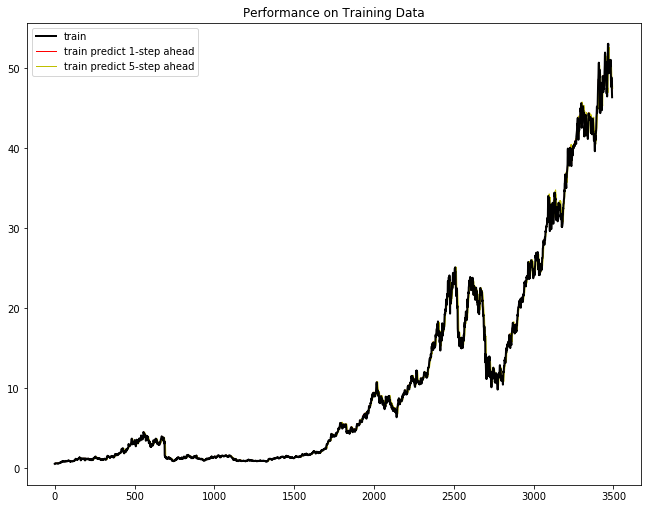

In [5]:
lstmPredictor = UnivariateLSTMPredictor(3, 5, [50], 50)
lstmPredictor.train(training)
lstmPredictor.visualize_training([1, 5])

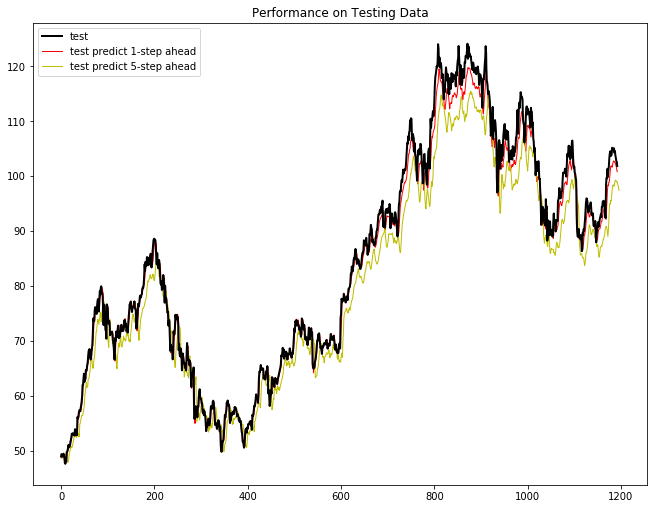

In [6]:
lstmPredictor.predict(testing)
lstmPredictor.visualize_testing([1, 5])

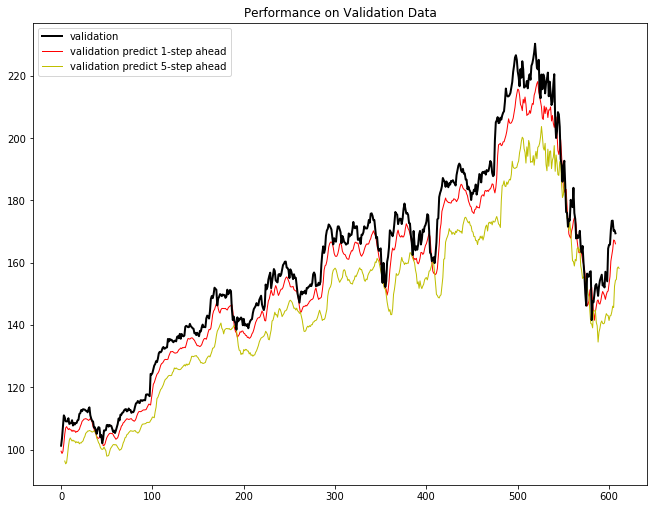

In [7]:
lstmPredictor.predict(validation)
lstmPredictor.visualize_validation([1, 5])